### Calories burnt prediction

In [1]:
# Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

In [2]:
# Loading the data into the dataframe
features_data = pd.read_csv('dataset/exercise.csv')
target_data = pd.read_csv('dataset/calories.csv')

In [3]:
# Loading the first 5 rows
features_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
# Loading the first 5 rows of target
target_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
# Checking for null values
features_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [6]:
target_data.isnull().sum()

User_ID     0
Calories    0
dtype: int64

In [7]:
# Checking the shape of the file
features_data.shape

(15000, 8)

In [8]:
target_data.shape

(15000, 2)

In [9]:
# Joining both the data by mapping it using the User_id
calories_data = pd.merge(features_data,target_data,on='User_ID')

# Or we can use the concat 
# calories_data = pd.concat([feafeatures_data,targetarget_data['Column_to_concat']],axis=1)

In [10]:
# printing the data
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


The idea behing this is the heart rate is indirectly telling us the exercise a person is doing like waling or running etc and using this we try to find or predict the calories burnt 

In [11]:
# Checking the shape of the dataframe
calories_data.shape

(15000, 9)

In [12]:
# Checking for discrete values in gender col
calories_data['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [13]:
# Encoding the categorical cols
encoder = LabelEncoder()
cols = ['Gender']
def label_encoder(col):
    for column in col:
        calories_data[column] = encoder.fit_transform(calories_data[column])

# Running the encoder
label_encoder(cols)

In [14]:
# Checking if the data is encoded or not
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [15]:
# Checking for discrete values in gender col
calories_data['Gender'].value_counts()

Gender
0    7553
1    7447
Name: count, dtype: int64

Male -> 1 <br>
Female -> 0

#### Statistical Values

In [16]:
calories_data.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.496467,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,0.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

<Figure size 600x600 with 0 Axes>

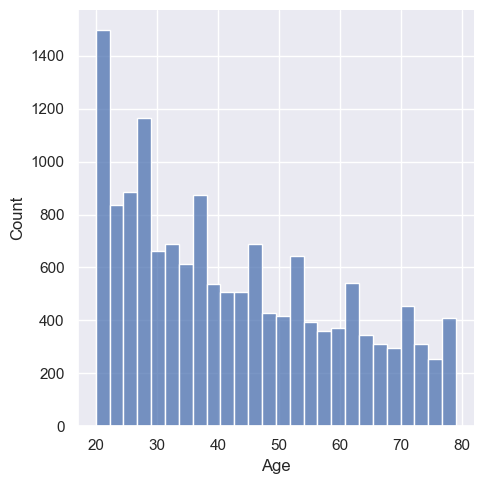

In [17]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(calories_data['Age'])
plt.show()

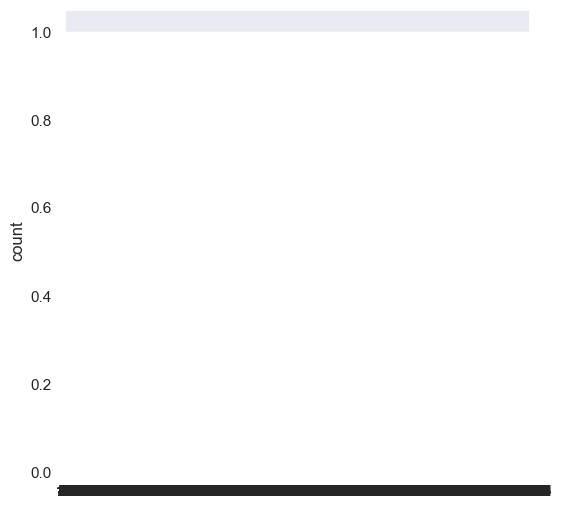

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(calories_data['Gender'])
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_780\1046697126.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


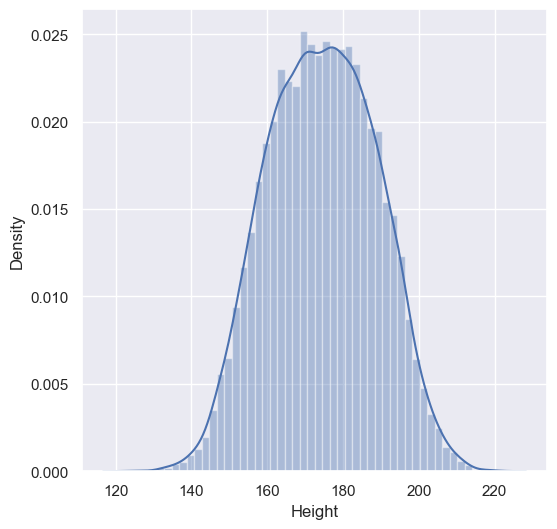

In [19]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data['Height'])
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_780\29650283.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


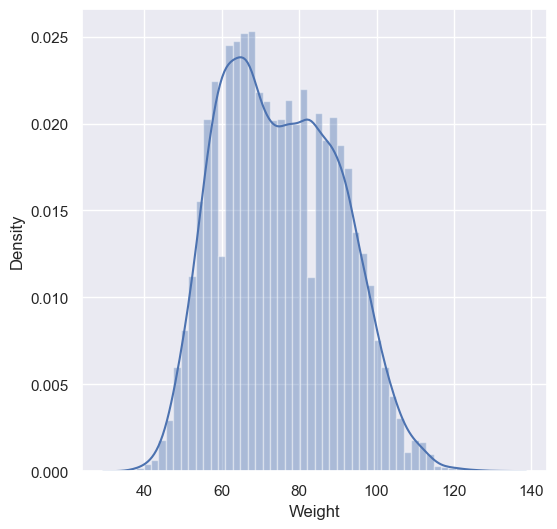

In [20]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data['Weight'])
plt.show()

Finding the correlation in the dataset

In [21]:
correlation =calories_data.corr()

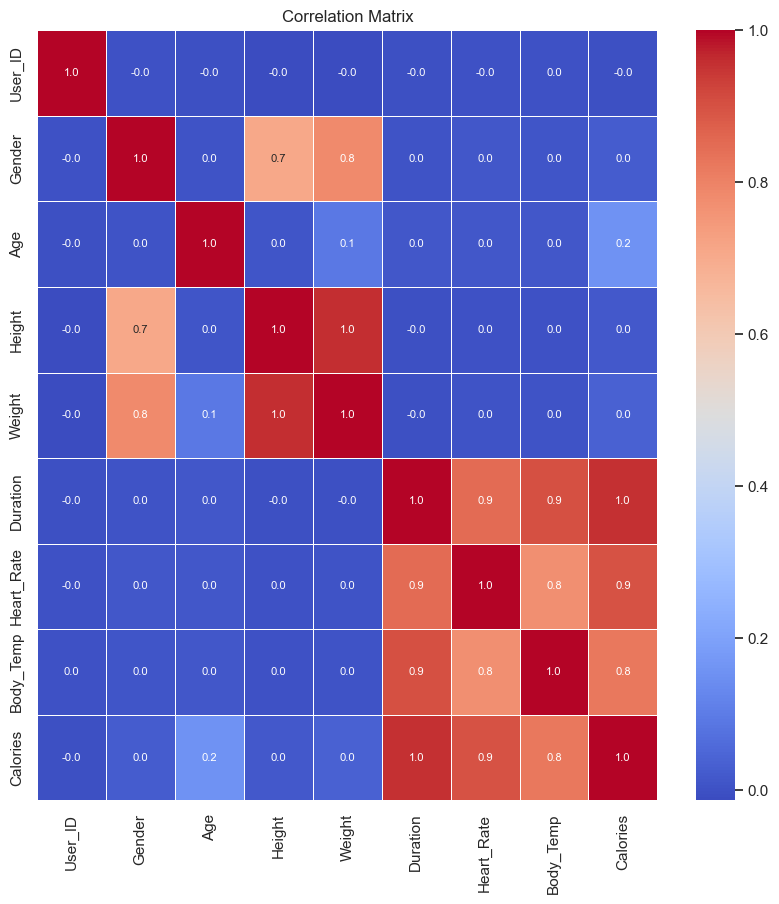

In [22]:
# Constructing a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt='.1f',linewidths=0.5,annot_kws={'size':8})
plt.title("Correlation Matrix")
plt.show()

Seprating the features and target

In [23]:
# Splitting the feature and target
X = calories_data.drop(columns=['User_ID','Calories'],axis=1)
y = calories_data['Calories']

In [24]:
# Checking the values
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4
14996,0,27,165.0,65.0,6.0,85.0,39.2
14997,0,43,159.0,58.0,16.0,90.0,40.1
14998,1,78,193.0,97.0,2.0,84.0,38.3


In [25]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

Standardizing the dataset


In [26]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

X

array([[ 1.00709181,  1.48472604,  1.08958204, ...,  1.61912727,
         0.98940395,  0.99402302],
       [-0.99295813, -1.34217934, -0.59372619, ..., -0.1839901 ,
        -0.15846102,  0.3523425 ],
       [ 1.00709181,  1.5436199 ,  0.31806577, ..., -1.26586052,
        -0.78456918, -1.70103518],
       ...,
       [-0.99295813,  0.01237949, -1.08469109, ...,  0.05642555,
        -0.57586646,  0.09567029],
       [ 1.00709181,  2.07366466,  1.29999557, ..., -1.62648399,
        -1.20197462, -2.21437961],
       [ 1.00709181,  1.19025673, -0.10276129, ...,  0.2968412 ,
        -0.36716374,  0.60901471]])

Splitting the dataset in train and test data

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [28]:
# Checking the ratio of the seprated data
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


**Training the model**

In [29]:
regressor = XGBRegressor()

In [30]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Model Evaluation

In [35]:
train_data_prediction = regressor.predict(X_train)
r_square_value_train = metrics.r2_score(y_train,train_data_prediction)
mse_train = metrics.mean_absolute_error(y_train,train_data_prediction)
print(f"R Square Value : {r_square_value_train*100}")
print(f"Mean Absolute Error : {mse_train}")

R Square Value : 99.95691477017405
Mean Absolute Error : 0.9322033420062313


In [36]:
test_data_prediction = regressor.predict(X_test)
r_square_value_test = metrics.r2_score(y_test,test_data_prediction)
mse_test = metrics.mean_absolute_error(y_test,test_data_prediction)
print(f"R Square Value {r_square_value_test*100}")
print(f"Mean Absolute Error : {mse_test}")

R Square Value 99.8800624504713
Mean Absolute Error : 1.4833678883314132


I am not making a predictive system inside it as i have done in other projects you can do it in this also if you want to